# Linear Regression

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

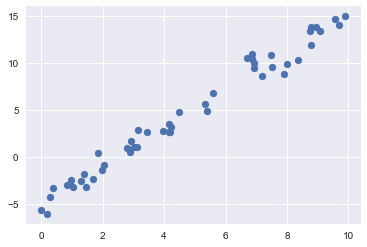

In [14]:
# Generate the example data
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x[:,np.newaxis], y)

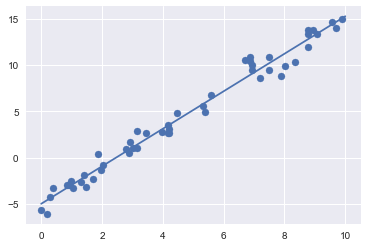

In [23]:
from sklearn.linear_model import LinearRegression # choose classification model
clf = LinearRegression() # instantiate model
clf.fit(x[:,np.newaxis],y) # fit model
xfit = np.linspace(0,10,1000)
yfit = clf.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)

In [26]:
print ("model intercept:", clf.intercept_)
print ("model slope:", clf.coef_)

model intercept: -4.99857708555
model slope: [ 2.02720881]


### Multidimensional Linear Models
- $y = a_0 + a_1 x_1 + a_2 x_2 + \cdots$

In [28]:
# Generate the example data
rang = np.random.RandomState(0)
x = 10 * rng.rand(100,3)
y = 0.5 + np.dot(x,[1.5,-2.,1.])

clf.fit(x,y)
print ("model intercept:", clf.intercept_)
print ("model slope:", clf.coef_)

model intercept: 0.5
model slope: [ 1.5 -2.   1. ]


### Polynomial Regression
- $y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots$
- **This is still a linear model**—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other. **What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension**, so that a linear fit can fit more complicated relationships between $x$ and $y$.

In [37]:
## Polynomial basis functions
from sklearn.preprocessing import PolynomialFeatures # Preprocessing
x = np.array([2,3,4])
poly = PolynomialFeatures(degree=3)
poly.fit_transform(x[:,None])


array([[  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.]])

Transform the one-dimensional array into three dimensional array by taking the exponent of each value.

In [92]:
from sklearn.pipeline import make_pipeline
ploy_clf = make_pipeline(PolynomialFeatures(7),LinearRegression()) # make pipeline

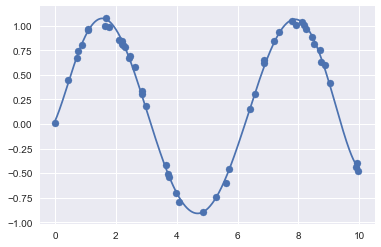

In [93]:
#Generate a example data
x = 10 * rng.rand(50)
y  =  np.sin(x) + 0.1 * rng.rand(50)

ploy_clf.fit(x[:,None],y) # fit pipeline
yfit = ploy_clf.predict(xfit[:,None]) # prediction
plt.scatter(x,y)
plt.plot(xfit,yfit,)

**Linear model**, through the use of **7th-order polynomial basis functions**, can provide an excellent **fit to the non-linear data!**

### Gaussian basis functions

![](https://imgur.com/TWw9sdC.jpg)

### Regularization
- L1(Lasso Regression) $P = \alpha\sum_{n=1}^N |\theta_n|$
- L2(Ridge Regression) $P = \alpha\sum_{n=1}^N \theta_n^2$

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y)/width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self,X,y=None):
        self.centers_ = np.